### Load the data

In [1]:
#Load the data
import numpy as np
import pandas as pd

TASK = "one"   # task is either 'one' or 'two'
assert TASK in ["one", "two"], "TASK should be one or two."

df_train = pd.read_csv(
    f"../Data/AuTextification/raw/subtask_{TASK}_train.tsv",
    sep="\t",
    header=0,
    index_col=0
)


target = df_train["label"]



### Feature Extraction

In [ ]:
from feature_extraction import *

features = {
    "text_length": text_length,
    "word_count": word_count,
    "average_word_length": average_word_length,
    "average_sentence_length": average_sentence_length,
    "punctuation_frequencies": punctuation_frequencies,
    "part_of_speech_frequencies": part_of_speech_frequencies,
    "letter_frequencies": letter_frequencies,
    "vowel_sound_frequencies": vowel_sound_frequencies,
    "vowel_sound_pair_frequencies": vowel_sound_pair_frequencies,
}


#"normal" features. That is, features that return a single value per text.
normal_features_df = df_train[["text"]].copy()


#"frequency-based features". That is, features that return a dictionary of frequencies.
punctuation_frequencies_df = df_train[["text"]].copy()
part_of_speech_frequencies_df = df_train[["text"]].copy()
letter_frequencies_df = df_train[["text"]].copy()
vowel_sound_frequencies_df = df_train[["text"]].copy()
vowel_sound_pair_frequencies_df = df_train[["text"]].copy()

feature_to_df = {
    "text_length": normal_features_df,
    "word_count": normal_features_df,
    "average_word_length": normal_features_df,
    "average_sentence_length": normal_features_df,
    "punctuation_frequencies": punctuation_frequencies_df,
    "part_of_speech_frequencies": part_of_speech_frequencies_df,
    "letter_frequencies": letter_frequencies_df,
    "vowel_sound_frequencies": vowel_sound_frequencies_df,
    "vowel_sound_pair_frequencies": vowel_sound_pair_frequencies_df
}

#extract the features
for feature_name, feature_func in features.items():
    if feature_name in ["punctuation_frequencies", "part_of_speech_frequencies", 
                        "letter_frequencies", "vowel_sound_frequencies", "vowel_sound_pair_frequencies"]:
        # For frequency-based features, we will create multiple columns
        print(f"Extracting feature: {feature_name}")
        df = feature_to_df[feature_name]
        feature_df = df_train["text"].apply(feature_func).apply(pd.Series)
        df = pd.concat([df, feature_df.add_prefix(f"{feature_name}_")], axis=1)
        feature_to_df[feature_name] = df
    else:
        print(f"Extracting feature: {feature_name}")
        normal_features_df[f"{feature_name}"] = df_train["text"].apply(feature_func)

punctuation_frequencies_df = feature_to_df["punctuation_frequencies"]
part_of_speech_frequencies_df = feature_to_df["part_of_speech_frequencies"]
letter_frequencies_df = feature_to_df["letter_frequencies"]
vowel_sound_frequencies_df = feature_to_df["vowel_sound_frequencies"]
vowel_sound_pair_frequencies_df = feature_to_df["vowel_sound_pair_frequencies"]

#all features df
all_features_df = pd.concat([normal_features_df,
                            punctuation_frequencies_df, 
                               part_of_speech_frequencies_df, 
                               letter_frequencies_df, 
                               vowel_sound_frequencies_df, 
                               vowel_sound_pair_frequencies_df], axis = 1)

print("All features extracted.")

All features extracted.


### Some exploratory data analysis

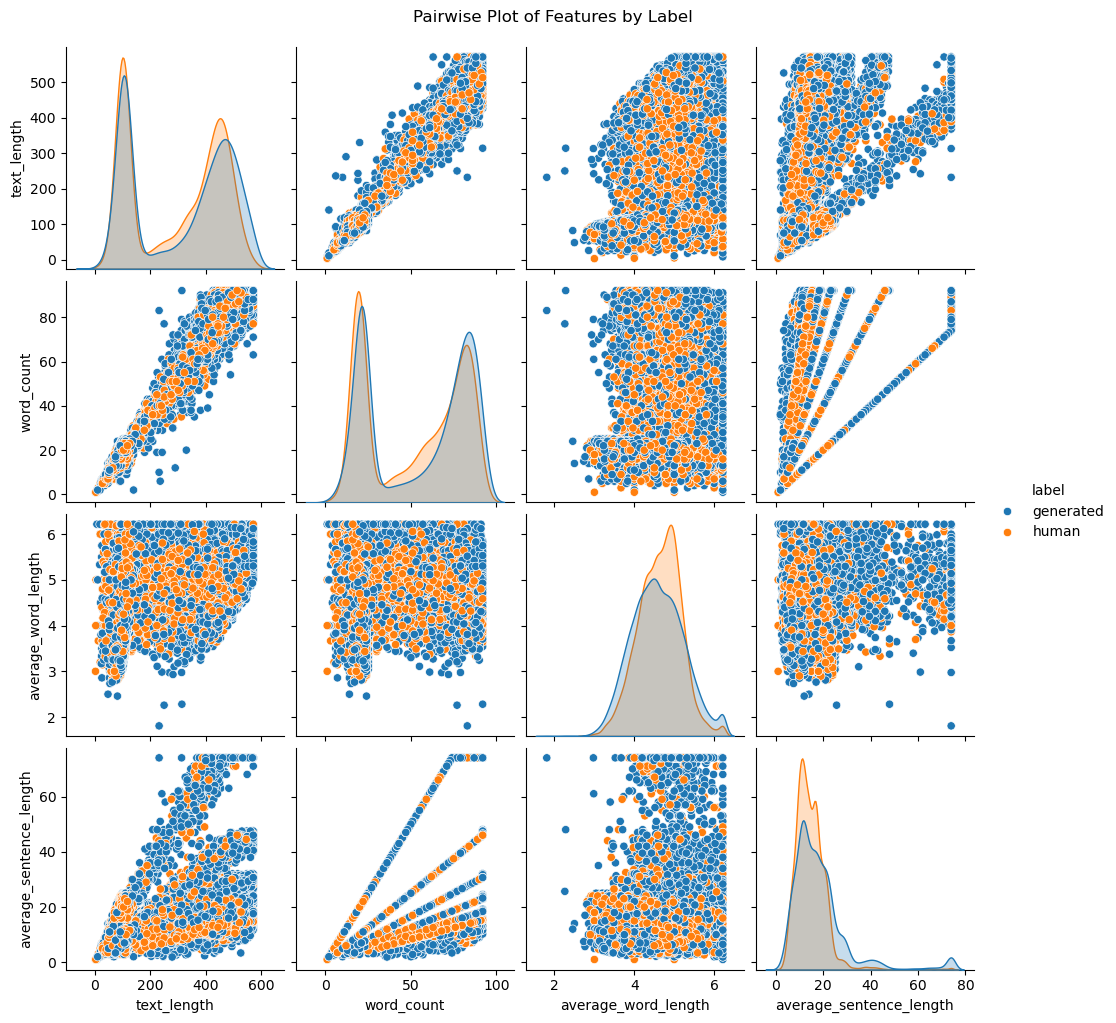

In [ ]:
#make pairwise plot of a few features
import seaborn as sns
import matplotlib.pyplot as plt

features_to_plot = [
    "text_length",
    "word_count",
    "average_word_length",
    "average_sentence_length"
]

plot_df = normal_features_df.copy()
plot_df["label"] = target


#first clip outliers
for feature in features_to_plot:
    threshold = normal_features_df[feature].quantile(0.99)
    plot_df[feature] = plot_df[feature].clip(upper=threshold)
#normalize features

#plot pairwise plot
sns.pairplot(plot_df, hue="label", vars=features_to_plot)
plt.suptitle("Pairwise Plot of Features by Label", y=1.02)
plt.show()



In [ ]:
for col in vowel_sound_pair_frequencies_df.columns:
    print(f"Column: {col}")

Column: text
Column: vowel_sound_pair_frequencies_ERER
Column: vowel_sound_pair_frequencies_EREY
Column: vowel_sound_pair_frequencies_ERIY
Column: vowel_sound_pair_frequencies_EROW
Column: vowel_sound_pair_frequencies_ERUH
Column: vowel_sound_pair_frequencies_ERAY
Column: vowel_sound_pair_frequencies_EREH
Column: vowel_sound_pair_frequencies_ERUW
Column: vowel_sound_pair_frequencies_ERAO
Column: vowel_sound_pair_frequencies_ERAH
Column: vowel_sound_pair_frequencies_ERAW
Column: vowel_sound_pair_frequencies_ERIH
Column: vowel_sound_pair_frequencies_EROY
Column: vowel_sound_pair_frequencies_ERAE
Column: vowel_sound_pair_frequencies_ERAA
Column: vowel_sound_pair_frequencies_EYER
Column: vowel_sound_pair_frequencies_EYEY
Column: vowel_sound_pair_frequencies_EYIY
Column: vowel_sound_pair_frequencies_EYOW
Column: vowel_sound_pair_frequencies_EYUH
Column: vowel_sound_pair_frequencies_EYAY
Column: vowel_sound_pair_frequencies_EYEH
Column: vowel_sound_pair_frequencies_EYUW
Column: vowel_sound_p

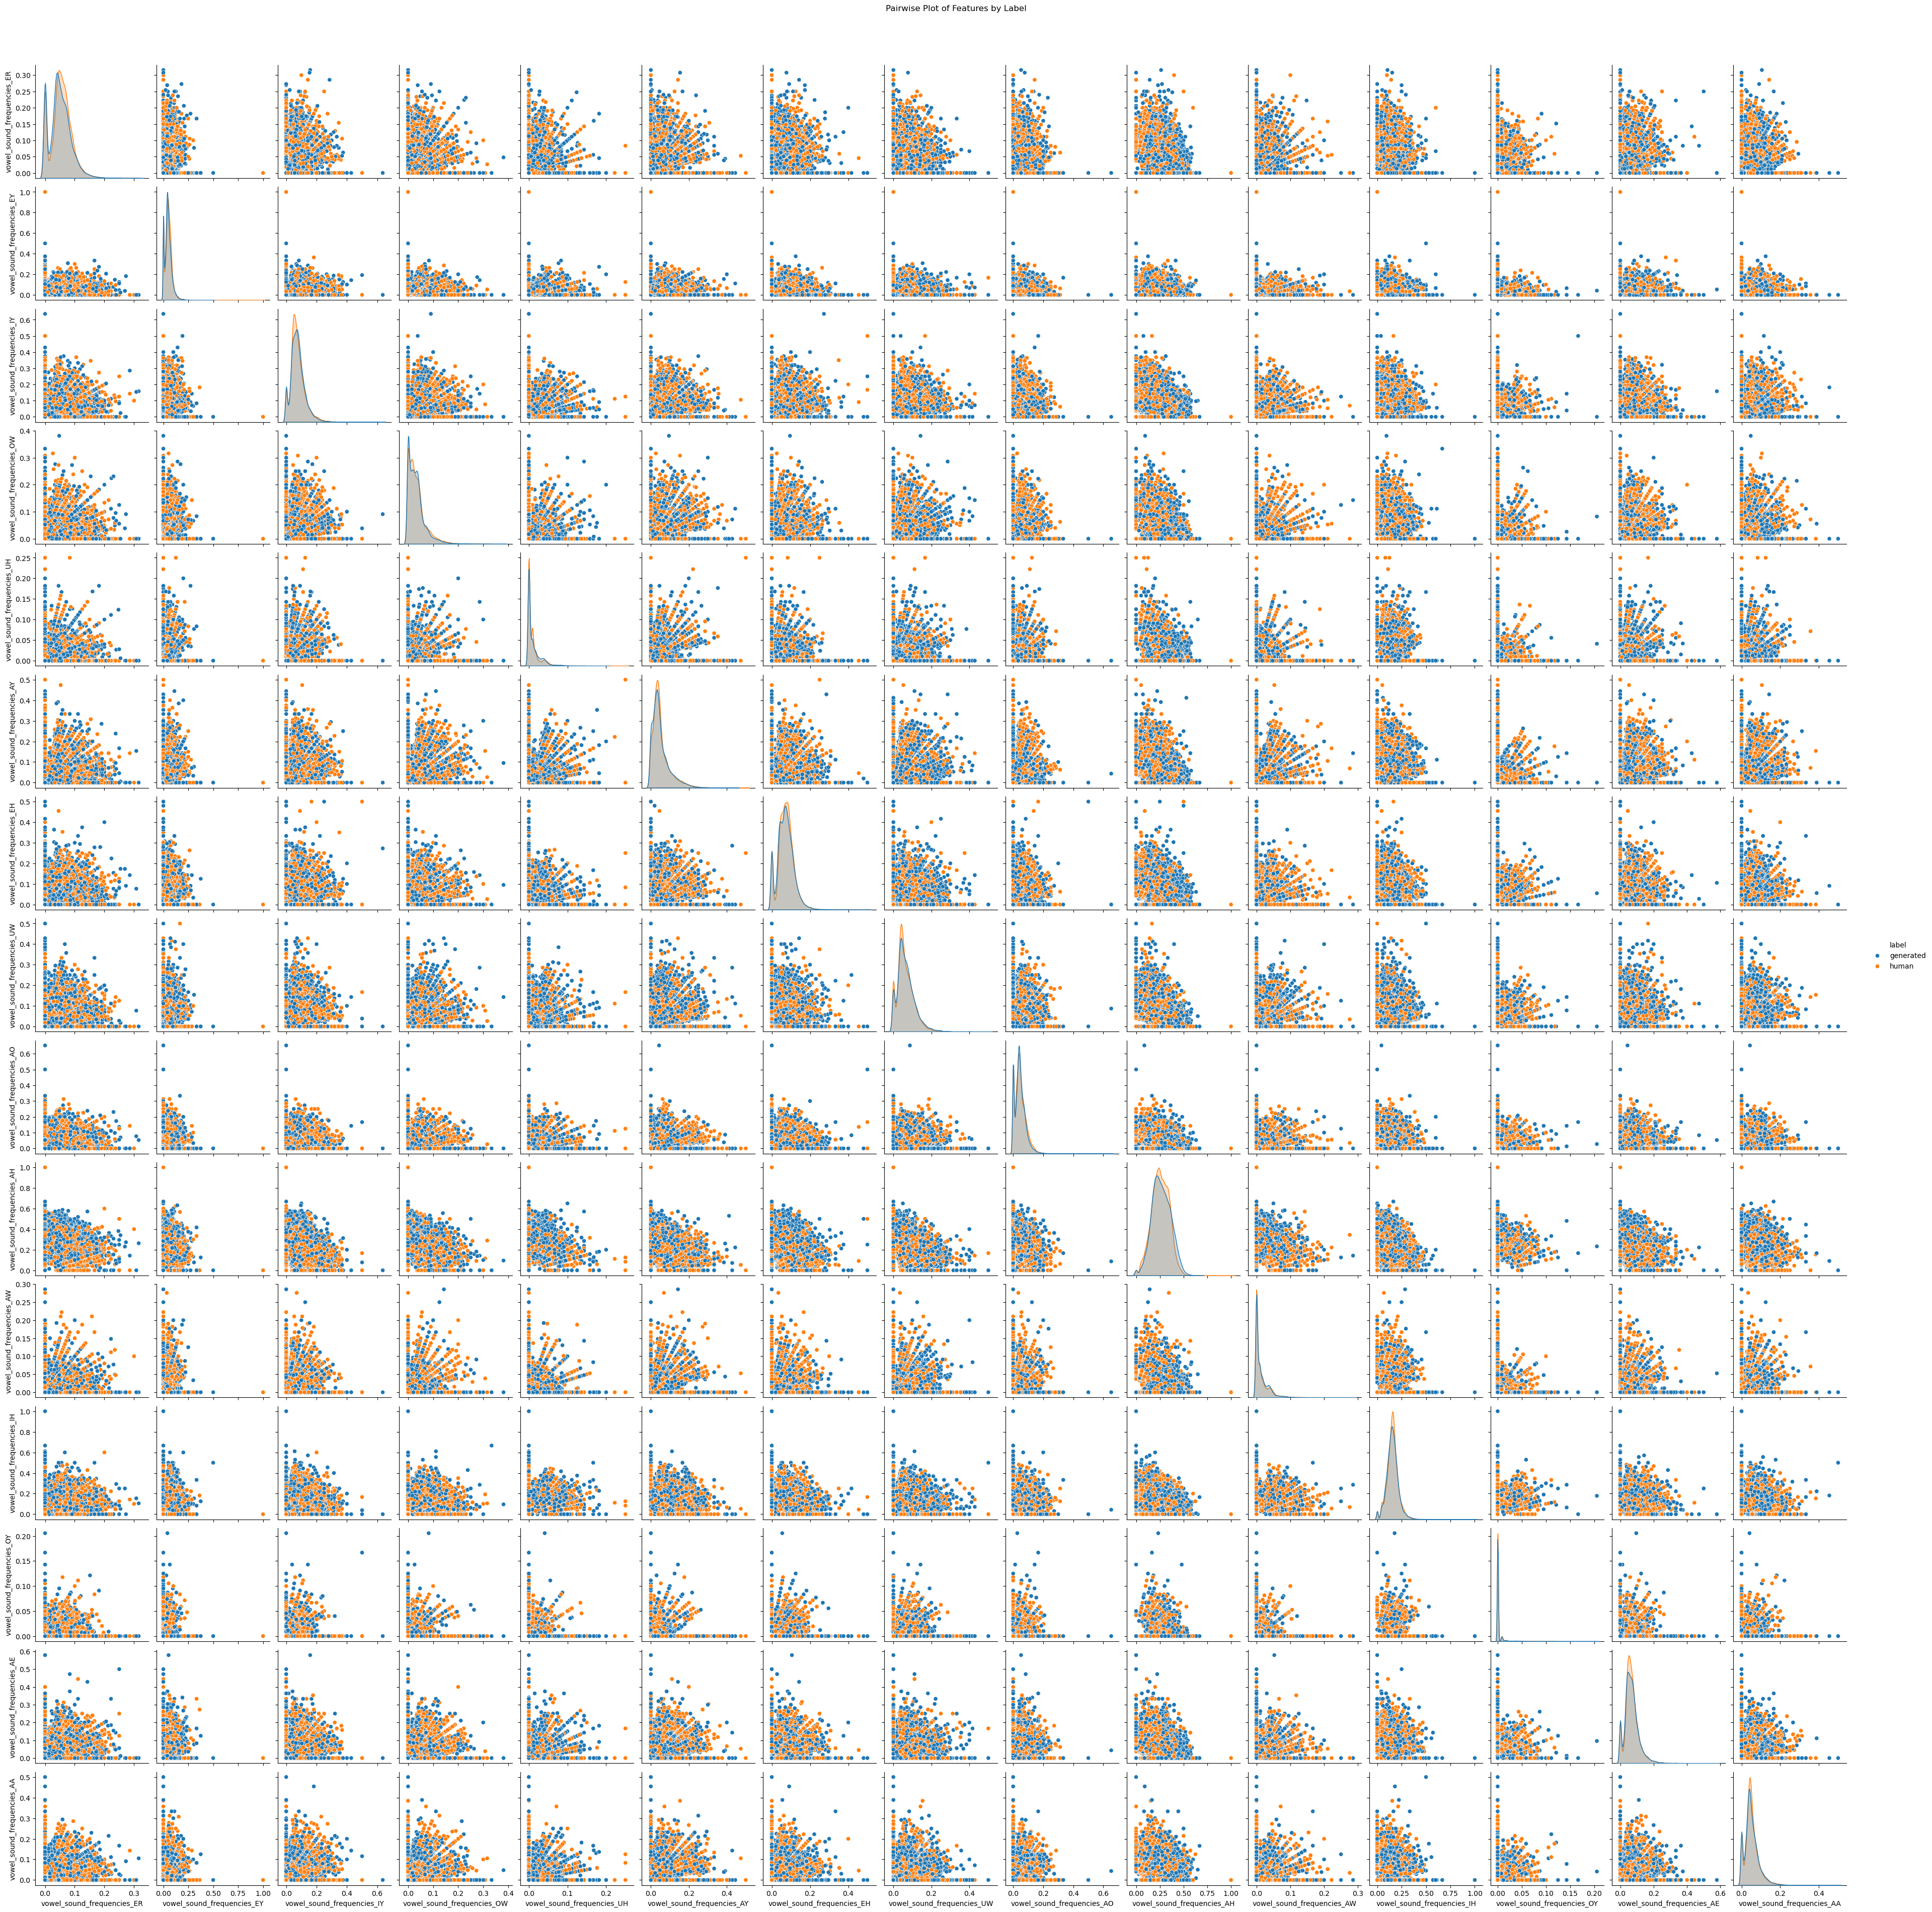

In [ ]:
#pairwise plot of vowel sound frequencies
plot_df = vowel_sound_frequencies_df.copy()
#remove the 'text' column
plot_df = plot_df.drop(columns=["text"])
plot_df["label"] = target
features_to_plot = plot_df.columns.tolist()
features_to_plot.remove("label")

sns.pairplot(plot_df, hue="label", vars=features_to_plot)
plt.suptitle("Pairwise Plot of Features by Label", y=1.02)
plt.show()


In [ ]:
plot_df.columns

Index(['vowel_sound_frequencies_ER', 'vowel_sound_frequencies_EY',
       'vowel_sound_frequencies_IY', 'vowel_sound_frequencies_OW',
       'vowel_sound_frequencies_UH', 'vowel_sound_frequencies_AY',
       'vowel_sound_frequencies_EH', 'vowel_sound_frequencies_UW',
       'vowel_sound_frequencies_AO', 'vowel_sound_frequencies_AH',
       'vowel_sound_frequencies_AW', 'vowel_sound_frequencies_IH',
       'vowel_sound_frequencies_OY', 'vowel_sound_frequencies_AE',
       'vowel_sound_frequencies_AA', 'label'],
      dtype='object')

In [ ]:
plot_df

vowel_sound_frequencies_IY  vowel_sound_frequencies_UW  \
0                        0.041667                    0.125000   
1                        0.075472                    0.012579   
2                        0.076923                    0.000000   
3                        0.050000                    0.000000   
4                        0.040541                    0.094595   
...                           ...                         ...   
34450                    0.120000                    0.000000   
34451                    0.050000                    0.050000   
34452                    0.055556                    0.111111   
34453                    0.062147                    0.067797   
34454                    0.074074                    0.037037   

       vowel_sound_frequencies_AY  vowel_sound_frequencies_EY  \
0                        0.041667                    0.083333   
1                        0.012579                    0.037736   
2                        0.115385                    0.038462   
3                        0.150000                    0.000000   
4                        0.027027                    0.121622   
...                           ...                         ...   
34450                    0.080000                    0.040000   
34451                    0.025000                    0.058333   
34452                    0.277778                    0.000000   
34453                    0.022599                    0.039548   
34454                    0.185185                    0.037037   

       vowel_sound_frequencies_AH  vowel_sound_frequencies_AO  \
0                        0.166667                    0.000000   
1                        0.408805                    0.050314   
2                        0.192308                    0.038462   
3                        0.150000                    0.100000   
4                        0.229730                    0.040541   
...                           ...                         ...   
34450                    0.200000                    0.160000   
34451                    0.350000                    0.033333   
34452                    0.000000                    0.166667   
34453                    0.305085                    0.033898   
34454                    0.185185                    0.037037   

       vowel_sound_frequencies_IH  vowel_sound_frequencies_ER  \
0                        0.291667                    0.000000   
1                        0.119497                    0.050314   
2                        0.192308                    0.038462   
3                        0.250000                    0.000000   
4                        0.135135                    0.000000   
...                           ...                         ...   
34450                    0.080000                    0.120000   
34451                    0.133333                    0.108333   
34452                    0.111111                    0.000000   
34453                    0.180791                    0.112994   
34454                    0.185185                    0.074074   

       vowel_sound_frequencies_EH  vowel_sound_frequencies_UH  \
0                        0.083333                    0.041667   
1                        0.106918                    0.012579   
2                        0.038462                    0.038462   
3                        0.050000                    0.000000   
4                        0.067568                    0.013514   
...                           ...                         ...   
34450                    0.040000                    0.000000   
34451                    0.058333                    0.000000   
34452                    0.000000                    0.000000   
34453                    0.062147                    0.000000   
34454                    0.000000                    0.037037   

       vowel_sound_frequencies_OW  vowel_sound_frequencies_AA  \
0                        0.000000    

In [4]:
vowel_sound_frequencies("Hello, world! This is a test sentence. How are you doing today?")

{'AW': 0.0625,
 'IY': 0.0,
 'AH': 0.25,
 'UH': 0.0,
 'EY': 0.0625,
 'AO': 0.0,
 'AE': 0.0,
 'AY': 0.0,
 'EH': 0.125,
 'IH': 0.1875,
 'OW': 0.0625,
 'ER': 0.0625,
 'UW': 0.125,
 'AA': 0.0625,
 'OY': 0.0}

### Baseline models

We will train baseline models using only text length and word count features.
Our two baseline models will be a logistic regression model and a random forest classifier.

In [5]:
'''
We will train baseline models using only text length and word count features.
Our two baseline models will be a logistic regression model and a random forest classifier.
'''

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and validation sets
X = df_train[["text_length", "word_count"]]
y = df_train["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
# Evaluate the logistic regression model
y_pred_logistic = logistic_model.predict(X_test)
print("Logistic Regression Model:")
print(classification_report(y_test, y_pred_logistic))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))

#Train a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
# Evaluate the random forest classifier
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))







KeyError: "None of [Index(['text_length', 'word_count'], dtype='object')] are in the [columns]"

### Train full model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and validation sets
X = df_train.drop(columns=["label", "text", "id", "prompt", "model", "domain"])
y = df_train["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Train a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
# Evaluate the random forest classifier
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))



ValueError: at least one array or dtype is required

In [ ]:
#concatenate the frequency-based features into a single DataFrame
frequency_features_df = pd.concat([
    punctuation_frequencies_df,
    part_of_speech_frequencies_df,
    letter_frequencies_df,
    vowel_sound_frequencies_df,
    vowel_sound_pair_frequencies_df
], axis=1)





Index(['text', 'punctuation_frequencies_.', 'punctuation_frequencies_,',
       'punctuation_frequencies_!', 'punctuation_frequencies_?',
       'punctuation_frequencies_;', 'punctuation_frequencies_:',
       'punctuation_frequencies_-', 'punctuation_frequencies_—',
       'punctuation_frequencies_&',
       ...
       'vowel_sound_pair_frequencies_('AA', 'AY')',
       'vowel_sound_pair_frequencies_('AA', 'EH')',
       'vowel_sound_pair_frequencies_('AA', 'UW')',
       'vowel_sound_pair_frequencies_('AA', 'AO')',
       'vowel_sound_pair_frequencies_('AA', 'AH')',
       'vowel_sound_pair_frequencies_('AA', 'AW')',
       'vowel_sound_pair_frequencies_('AA', 'IH')',
       'vowel_sound_pair_frequencies_('AA', 'OY')',
       'vowel_sound_pair_frequencies_('AA', 'AE')',
       'vowel_sound_pair_frequencies_('AA', 'AA')'],
      dtype='object', length=529)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

#Train a random forest classifier with only vowel sound frequencies and vowel sound pair frequencies
X = pd.concat([
    vowel_sound_frequencies_df.drop(columns=["text"]),
    vowel_sound_pair_frequencies_df.drop(columns=["text"])
], axis=1)
y = df_train["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Train a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
# Evaluate the random forest classifier
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier with Vowel Sound Features:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classifier with Vowel Sound Features:
              precision    recall  f1-score   support

   generated       0.66      0.74      0.70      3413
       human       0.70      0.61      0.65      3356

    accuracy                           0.68      6769
   macro avg       0.68      0.68      0.67      6769
weighted avg       0.68      0.68      0.67      6769

Accuracy: 0.6763185108583247


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

#Train a random forest classifier with letter frequencies
X = letter_frequencies_df.drop(columns=["text"])
y = df_train["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Train a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
# Evaluate the random forest classifier
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier with letter Features:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classifier with letter Features:
              precision    recall  f1-score   support

   generated       0.64      0.72      0.68      3308
       human       0.70      0.61      0.65      3461

    accuracy                           0.67      6769
   macro avg       0.67      0.67      0.67      6769
weighted avg       0.67      0.67      0.67      6769

Accuracy: 0.6673068400059093


In [10]:
#ensembling vowel sound frequencies and letter frequencies random forest classifiers

X = pd.concat([
    vowel_sound_frequencies_df.drop(columns=["text"]),
    letter_frequencies_df.drop(columns=["text"])
], axis=1)
y = df_train["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.ensemble import RandomForestClassifier

# Create two random forest classifiers for vowel sounds and letters
rf_vowel = RandomForestClassifier(n_estimators=100, random_state=42)
rf_letter = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the classifiers
rf_vowel.fit(X_train[vowel_sound_frequencies_df.drop(columns=["text"]).columns], y_train)
rf_letter.fit(X_train[letter_frequencies_df.drop(columns=["text"]).columns], y_train)

prob_vowel = rf_vowel.predict_proba(X_test[vowel_sound_frequencies_df.drop(columns=["text"]).columns])
prob_letter = rf_letter.predict_proba(X_test[letter_frequencies_df.drop(columns=["text"]).columns])

# Average the probabilities
avg_prob = (prob_vowel + prob_letter) / 2
# Get the final predictions by taking the class with the highest average probability
y_pred_avg = np.argmax(avg_prob, axis=1)

y_true = 1*(y_test == "human")
# Evaluate the ensembled model
print("Ensembled Random Forest Classifier with Vowel Sound and Letter Features:")
print(classification_report(y_true, y_pred_avg))
print("Accuracy:", accuracy_score(y_true, y_pred_avg))



Ensembled Random Forest Classifier with Vowel Sound and Letter Features:
              precision    recall  f1-score   support

           0       0.66      0.73      0.69      3389
           1       0.70      0.62      0.66      3380

    accuracy                           0.68      6769
   macro avg       0.68      0.68      0.68      6769
weighted avg       0.68      0.68      0.68      6769

Accuracy: 0.6764662431673807


In [11]:
y_true = 1*(y_test == "human")
# Evaluate the ensembled model
print("Ensembled Random Forest Classifier with Vowel Sound and Letter Features:")
print(classification_report(y_true, y_pred_avg))
print("Accuracy:", accuracy_score(y_true, y_pred_avg))

Ensembled Random Forest Classifier with Vowel Sound and Letter Features:
              precision    recall  f1-score   support

           0       0.66      0.73      0.69      3389
           1       0.70      0.62      0.66      3380

    accuracy                           0.68      6769
   macro avg       0.68      0.68      0.68      6769
weighted avg       0.68      0.68      0.68      6769

Accuracy: 0.6764662431673807


In [12]:
all_features_df = pd.concat([normal_features_df,
                            punctuation_frequencies_df, 
                               part_of_speech_frequencies_df, 
                               letter_frequencies_df, 
                               vowel_sound_frequencies_df, 
                               vowel_sound_pair_frequencies_df], axis = 1)



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Train a random forest classifier with letter frequencies
X = all_features_df.drop(columns=["text"])
y = df_train["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Train a random forest classifier
rf_model = ExtraTreesClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
# Evaluate the random forest classifier
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier with letter Features:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classifier with letter Features:
              precision    recall  f1-score   support

   generated       0.73      0.81      0.77      3377
       human       0.79      0.69      0.74      3392

    accuracy                           0.75      6769
   macro avg       0.76      0.75      0.75      6769
weighted avg       0.76      0.75      0.75      6769

Accuracy: 0.7546166346579997


In [13]:
# Get feature importances and select top 20 features
importances = rf_model.feature_importances_
feature_names = all_features_df.drop(columns=["text"]).columns
top20_idx = np.argsort(importances)[-20:][::-1]
top20_features = feature_names[top20_idx]

# Retrain using only the top 20 features
X_top20 = all_features_df[top20_features]
y = df_train["label"]
X_train, X_test, y_train, y_test = train_test_split(X_top20, y, test_size=0.2)

rf_top20 = RandomForestClassifier(n_estimators=100)
rf_top20.fit(X_train, y_train)
y_pred_top20 = rf_top20.predict(X_test)

print("Random Forest Classifier with Top 20 Features:")
print(classification_report(y_test, y_pred_top20))
print("Accuracy:", accuracy_score(y_test, y_pred_top20))


Random Forest Classifier with Top 20 Features:
              precision    recall  f1-score   support

   generated       0.77      0.79      0.78      3438
       human       0.78      0.76      0.77      3331

    accuracy                           0.77      6769
   macro avg       0.77      0.77      0.77      6769
weighted avg       0.77      0.77      0.77      6769

Accuracy: 0.7730831732899985


In [39]:
#print out some misclassified text together

count = 0
for actual, pred, text in zip(y_test, y_pred_rf, all_features_df["text"]):
    if True:#actual != pred:
        print(f"Actual: {actual}, Predicted: {pred}")
        print(text, "\n"*3)
        count += 1
    if count > 1000:
        break


Actual: generated, Predicted: human
you need to stop the engine and wait until it stops. This is how I would do it: // Check if its safe 



Actual: generated, Predicted: human
The Commission shall publish the report; an interim report at least once every two years, and whenever it considers that such a report is necessary or appropriate. 2. The Commission may request any relevant information from the Member States, the Council, the European Parliament, international organizations, bodies or specialized agencies. 3. The Commission shall ensure adequate access by the competent national authorities for the purpose of implementing this Regulation. 4. The Commission shall give special attention to the social dimension of the programme. 5. The 



Actual: human, Predicted: human
I have not been tweeting a lot lately, but I did in November, and it was a really good month. I also 



Actual: generated, Predicted: generated
I pass my exam and really thankgod for that but idk where will I go fo

In [55]:
for x in all_features_df["text"].sample(5):
    print(x, "\n")
    

The inner and outer walls of the chamber are lined with fiberglass which helps prevent any leaks. A container or pan is placed inside the chamber. This allows the user to pour liquid fuel into the tank, such as kerosene, gasoline, distilled alcohol or diesel oil, and then mix it up by stirring with a spatula. Fuel can also be poured directly into the chamber without mixing before pouring into the tank. A filter holder is mounted on top of the chamber 

@Cookleta @blacknight010 okayyyy i have 2 go to sum boring relatives gotta get dressed b4 mom comestake care luv ya sleep 

How is there 25 cases to be heard today??? Why??? I wanna leave sooo bad! I have 6 therapy 

(1) Article 1 shall apply to all decisions which determine the grant of subsidies. (2) Article 2 shall apply to decisions relating to grants of subsidies for the following products: (a) agricultural products; (b) processed agricultural products; (c) wine, beer and spirits; (d) alcoholic beverages not specified in Annex I, II

In [67]:
wiki = df_train[df_train["domain"] == "wiki"]

sample = wiki.sample(10)
for x in sample["text"]:
    print(x, "\n")

sample

There are two ways to activate Windows. The first is to use a USB key thats been activated using a USB key with the same version of Windows. If you have a Windows key thats been activated using a USB key with a different version of Windows, youll need to use a different key. You can use a USB key that was activated using a USB key with a different version of Windows to activate Windows. There are two ways to activate Windows. 

The company, which has been producing wellreceived games since the release of 2011s GTA 5 on the PS3 and Xbox 360, has been developing a new iteration of its flagship franchise titled Grand Theft Auto V since 2013. GTA 5 was a critical and commercial success, and also one of the bestselling games of all time. GTA 5 is expected to be released on the PS4 in 2014. 

If you are making a large batch, set them aside in a separate bowl to be used later. Set a timer for ten minutes and keep checking the oven on the ten minute mark. When the timer goes off, pull the patt

id                                             prompt  \
20463  34136  In order to activate your copy of Windows, you...   
27663  34224                                                  .   
4653   32548  Whisk the ingredients together to combine the ...   
22818  34417  Skunks are scavengers, so they'll eat anything...   
31226  26762                                          NO-PROMPT   
2117   27287                                          NO-PROMPT   
26554  31416                                          NO-PROMPT   
30578  25461  Fill a microwave-safe container with drinking ...   
16325  28222                                          NO-PROMPT   
15297  31470                                          NO-PROMPT   

                                                    text      label     model  \
20463  There are two ways to activate Windows. The fi...  generated         D   
27663  The company, which has been producing wellrece...  generated         D   
4653   If you are making a large batch, set them asid...  generated         E   
22818  More importantly, theres no reason to worry ab...  generated         D   
31226  Different styles of power metal use different ...      human  NO-MODEL   
2117   Then think about who your clientele will be, a...      human  NO-MODEL   
26554  It is much easier to buy molded fins than atte...      human  NO-MODEL   
30578  Place the strawberry slices in the water, cove...  generated         C   
16325  You can search using either an images URL or b...      human  NO-MODEL   
15297  Breakups get even more complicated when childr...      human  NO-MODEL   

      domain  
20463   wiki  
27663   wiki  
4653    wiki  
22818   wiki  
31226   wiki  
2117    wiki  
26554   wiki  
30578   wiki  
16325   wiki  
15297   wiki

In [63]:
for x in sample["prompt"]:
    print(x)

And I want to o
'The country (or countries within a single group) of destination shall be shown in Section 7 and the licence shall carry with it the obligation to export to that country or countries. However, for up to 10 % of the quantities entered on the licence, the contract may be executed by delivery to another country indicated in Annex III as falling within the same group.'.
NO-PROMPT
Wear down the wood so it can better absorb the sealant.
NO-PROMPT


In [40]:
normal_features_df.describe()

text_length   word_count  average_word_length  average_sentence_length
count  33845.000000  33845.00000         33845.000000             33845.000000
mean     305.250584     53.65992             4.620025                16.526112
std      170.641872     28.66047             0.759581                10.607977
min        3.000000      1.00000             1.807229                 1.000000
25%      110.000000     22.00000             4.192308                10.600000
50%      361.000000     62.00000             4.612500                14.500000
75%      458.000000     81.00000             5.000000                19.750000
max      669.000000     98.00000            69.500000                96.000000

In [ ]:
rf_model.feature_importances_

array([1.30914145e-02, 1.54805554e-02, 1.31775201e-02, 2.89557539e-02,
       1.27199505e-02, 7.53261337e-03, 2.83346888e-03, 9.55443688e-04,
       2.01787345e-03, 3.51553942e-03, 0.00000000e+00, 1.51951905e-04,
       8.04818324e-04, 3.21082371e-04, 2.98846739e-03, 2.99000761e-03,
       4.63187146e-05, 0.00000000e+00, 0.00000000e+00, 1.07233582e-04,
       7.65433391e-03, 8.08021041e-03, 8.88356648e-03, 9.38423009e-03,
       6.77303854e-03, 1.05460947e-02, 1.54300051e-03, 1.04030800e-02,
       1.30551627e-02, 6.20731021e-03, 1.17673534e-02, 1.35519324e-02,
       1.09021238e-02, 5.40367746e-03, 1.22952601e-03, 1.00462127e-02,
       1.12420610e-02, 8.44082729e-03, 9.97487316e-03, 7.59550335e-03,
       7.28870559e-03, 7.75137594e-03, 6.74486680e-03, 7.50523382e-03,
       8.10271532e-03, 7.88639365e-03, 5.16822698e-03, 7.10023870e-03,
       1.62437126e-02, 7.35986743e-03, 7.44840966e-03, 7.84606969e-03,
       7.23374003e-03, 1.91846950e-03, 7.77277487e-03, 7.65850647e-03,
      